# Avaliação do Modelo de Classificação.
### Introdução.
Este Jupyter Notebook investiga a base de dados de  propriedades acústicas disponíveis no site  http://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/   
Objetivo da investigação é determinar as chances de algum algoritmo para detecção de gênero, seja por estatística tradicional ou por meio técnicas machine learning e redes neurais, possibilitando a implantação em dispositivos embarcados de baixo custo de memória e processamento restrito. 

# Propriedades acústicas medidas

As seguintes propriedades acústicas de cada voz são medidas:

- **meanfreq**  : frequência média (em kHz) sobre as amostras compostas no sinal de arquivo de voz;
- **sd**  : desvio padrão da frequência, sobre as amostras compostas no sinal de arquivo de voz;
- **mediana**  : frequência mediana (em kHz) sobre as amostras compostas no sinal de arquivo de voz;
- **Q25**  : primeiro quantil (em kHz) sobre as amostras compostas no sinal de arquivo de voz;
- **Q75**  : terceiro quantil (em kHz) sobre as amostras compostas no sinal de arquivo de voz;
- **IQR**  : intervalo interquartil (em kHz)sobre as amostras compostas no sinal de arquivo de voz;
- **skew**  : média de assimetria da distribuição das frequências de vocal perdominante;
- **kurt**  : curtose distribuição espectral da voz, domínio da frequência;
- **sp.ent**  : entropia espectral, pureza da distribuição da voz em relação ao nível de ruído; 
- **sfm**  : nivelamento espectral,  estima a planaridade de um espectro de frequência;
- **modo**  : frequência de modo, ou seja, frequência dominante da voz;
- **centrod**  : frequência central máxima visto no domínio da frequência;
- **meanfun**  : média da frequência fundamental medida através do sinal acústico (Tonalidade base da voz);
- **minfun**  : frequência fundamental mínima medida no sinal acústico  (Tonalidade base da voz);
- **maxfun**  : frequência fundamental máxima medida através do sinal acústico (Tonalidade base da voz);
- **meandom**  : média da frequência dominante medida através do sinal acústico  (média total das notas  musicais mais graves da voz em relação ao sinal gravado);
- **mindom**  : mínimo de frequência dominante medido através do sinal acústico;
- **maxdom**  : máxima da frequência dominante medida através do sinal acústico;
- **dfrange**  : faixa de frequência dominante medida através do sinal acústico;
- **modindx**  : índice de modulação. Calculado como a diferença absoluta acumulada entre medições adjacentes de frequências fundamentais divididas pela faixa de frequência.
- **label**  : rotulo de identificador da amostra em relação ao sexo, adicionado durante a gravação "male" ou "female".




#  Resumo da análise anterior com base tratada em python da base de propriedades acústicas.

In [1]:
%matplotlib inline

In [2]:
# Importa as bibliotecas
import pandas
import matplotlib.pyplot as plt
import numpy 
#from pandas.tools.plotting import scatter_matrix
from  pandas.plotting  import scatter_matrix
import seaborn as sb
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import Normalizer
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , roc_curve, auc ,accuracy_score,recall_score, precision_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix






In [3]:
url = ".\\baseDados\\voice_fix.csv"
colunas = ["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"]
dataset = pandas.read_csv(url,  sep = ",")

In [4]:
dataset[["meanfreq","sd","median"]].head(2)

,meanfreq,sd,median
0,0.183506,0.064241,0.190591
1,0.183506,0.067310,0.190591


## 1) Refazendo boxplot.
O BOXPLOT representa os dados através de um retângulo
construído com os quartis e fornece informação sobre valores
extremos. 

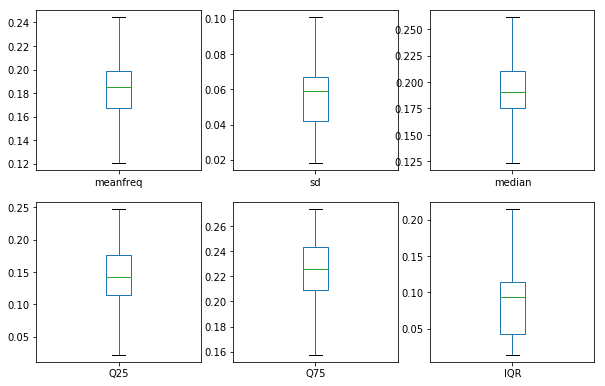

In [5]:
plt.rcParams['figure.figsize'] = (10,10)
dataset[colunas[0:6]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

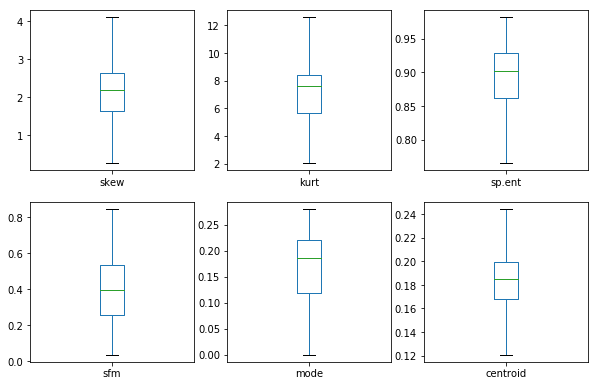

In [6]:
plt.rcParams['figure.figsize'] = (10,10)
dataset[colunas[6:6 * 2]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

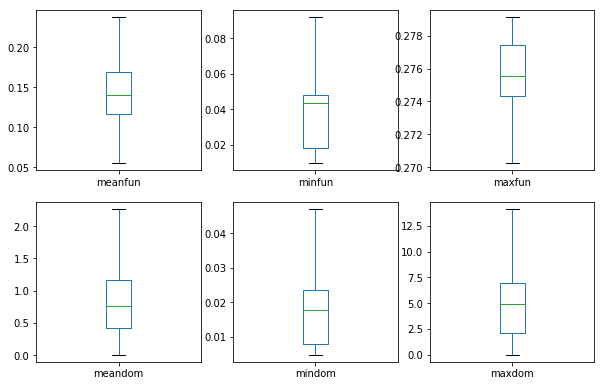

In [7]:
plt.rcParams['figure.figsize'] = (10,10)
dataset[colunas[6 *2 :6 * 3]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

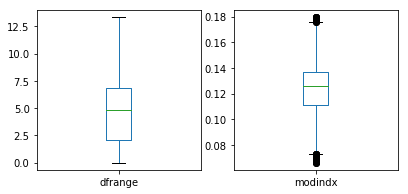

In [8]:
plt.rcParams['figure.figsize'] = (10,10)
dataset[colunas[6 *3 :6 * 4]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

## Fim do resumo análise exploraria.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , roc_curve, auc


In [10]:
url = ".\\baseDados\\voice_fix.csv"
colunas = ["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"]
dataset = pandas.read_csv(url,  sep = ",")

---


---



---
# Procedimentos de avaliação de modelo
Train/Test Split
K-Fold Cross Validation

##  2)  Preparando a base para usar no modelo de regressão logística.

In [11]:
print(dataset.head().transpose())

                    0           1           2          3          4
Unnamed: 0          0           1           2          3          4
meanfreq     0.183506    0.183506    0.183506   0.151228    0.13512
sd          0.0642413     0.06731   0.0838294  0.0721106  0.0791461
median       0.190591    0.190591    0.190591   0.158011   0.124656
Q25          0.142287    0.142482    0.142287  0.0965817  0.0787202
Q75          0.225624    0.225624    0.225624   0.207955   0.206045
IQR          0.075122   0.0732523    0.123207   0.111374   0.127325
skew          2.19606     2.19606     2.19606    1.23283    1.10117
kurt          8.44236     8.44236     8.44236     4.1773    4.33371
sp.ent       0.893369    0.892193    0.846389   0.963322   0.971955
sfm          0.491918    0.513724    0.478905   0.727232   0.783568
mode                0           0           0  0.0838782   0.104261
centroid     0.183506    0.183506    0.183506   0.151228    0.13512
meanfun     0.0842791    0.107937   0.0987063  0

##  3)  Removendo indexador salvo durante a análise da base.

In [12]:
df_pre=dataset.drop(columns=['Unnamed: 0'])

In [13]:
dataset=df_pre
print(dataset.head().transpose())

                  0           1           2          3          4
meanfreq   0.183506    0.183506    0.183506   0.151228    0.13512
sd        0.0642413     0.06731   0.0838294  0.0721106  0.0791461
median     0.190591    0.190591    0.190591   0.158011   0.124656
Q25        0.142287    0.142482    0.142287  0.0965817  0.0787202
Q75        0.225624    0.225624    0.225624   0.207955   0.206045
IQR        0.075122   0.0732523    0.123207   0.111374   0.127325
skew        2.19606     2.19606     2.19606    1.23283    1.10117
kurt        8.44236     8.44236     8.44236     4.1773    4.33371
sp.ent     0.893369    0.892193    0.846389   0.963322   0.971955
sfm        0.491918    0.513724    0.478905   0.727232   0.783568
mode              0           0           0  0.0838782   0.104261
centroid   0.183506    0.183506    0.183506   0.151228    0.13512
meanfun   0.0842791    0.107937   0.0987063  0.0889648   0.106398
minfun    0.0157017   0.0158259   0.0156556  0.0177976  0.0169312
maxfun    

##  4)  Substituindo female=1, male=0 e troca por o rótulo label=sexo.

In [14]:
df_pre['label'] = df_pre['label'].replace({'female': 1, 'male': 0})

In [15]:
dataset = df_pre

In [16]:
df =dataset.rename(columns={'label': 'sexo'})
print(df.head().transpose())

                 0         1         2         3         4
meanfreq  0.183506  0.183506  0.183506  0.151228  0.135120
sd        0.064241  0.067310  0.083829  0.072111  0.079146
median    0.190591  0.190591  0.190591  0.158011  0.124656
Q25       0.142287  0.142482  0.142287  0.096582  0.078720
Q75       0.225624  0.225624  0.225624  0.207955  0.206045
IQR       0.075122  0.073252  0.123207  0.111374  0.127325
skew      2.196061  2.196061  2.196061  1.232831  1.101174
kurt      8.442361  8.442361  8.442361  4.177296  4.333713
sp.ent    0.893369  0.892193  0.846389  0.963322  0.971955
sfm       0.491918  0.513724  0.478905  0.727232  0.783568
mode      0.000000  0.000000  0.000000  0.083878  0.104261
centroid  0.183506  0.183506  0.183506  0.151228  0.135120
meanfun   0.084279  0.107937  0.098706  0.088965  0.106398
minfun    0.015702  0.015826  0.015656  0.017798  0.016931
maxfun    0.275862  0.274345  0.271186  0.274345  0.275533
meandom   0.007812  0.009014  0.007990  0.201497  0.7128

#  5)   Dataset: Train/Test Split para do modelo de regressão logística.
Esse método divide o conjunto de dados em duas partes: um conjunto de treinamento e um conjunto de testes. O conjunto de treinamento é usado para treinar o modelo. Também podemos medir a precisão do modelo no conjunto de treinamento, mas não devemos avaliar modelos com base somente nessa métrica.

Logistic Regression coefficients na formula:
 y=  1 * b0 + b1*X1 + b2*X2+ b3*Xn

 ##   6)  Criando explicitamente  y-intercept: b0. 

In [17]:
df['int']=1
print(df.head().transpose())

                 0         1         2         3         4
meanfreq  0.183506  0.183506  0.183506  0.151228  0.135120
sd        0.064241  0.067310  0.083829  0.072111  0.079146
median    0.190591  0.190591  0.190591  0.158011  0.124656
Q25       0.142287  0.142482  0.142287  0.096582  0.078720
Q75       0.225624  0.225624  0.225624  0.207955  0.206045
IQR       0.075122  0.073252  0.123207  0.111374  0.127325
skew      2.196061  2.196061  2.196061  1.232831  1.101174
kurt      8.442361  8.442361  8.442361  4.177296  4.333713
sp.ent    0.893369  0.892193  0.846389  0.963322  0.971955
sfm       0.491918  0.513724  0.478905  0.727232  0.783568
mode      0.000000  0.000000  0.000000  0.083878  0.104261
centroid  0.183506  0.183506  0.183506  0.151228  0.135120
meanfun   0.084279  0.107937  0.098706  0.088965  0.106398
minfun    0.015702  0.015826  0.015656  0.017798  0.016931
maxfun    0.275862  0.274345  0.271186  0.274345  0.275533
meandom   0.007812  0.009014  0.007990  0.201497  0.7128

##   7)   Separando as variáveis independentes da variável resposta.

In [18]:
X_entrada = df.drop(columns=['sexo'])
Y_entrada = df['sexo']

In [19]:
print(X_entrada.head().transpose())

                 0         1         2         3         4
meanfreq  0.183506  0.183506  0.183506  0.151228  0.135120
sd        0.064241  0.067310  0.083829  0.072111  0.079146
median    0.190591  0.190591  0.190591  0.158011  0.124656
Q25       0.142287  0.142482  0.142287  0.096582  0.078720
Q75       0.225624  0.225624  0.225624  0.207955  0.206045
IQR       0.075122  0.073252  0.123207  0.111374  0.127325
skew      2.196061  2.196061  2.196061  1.232831  1.101174
kurt      8.442361  8.442361  8.442361  4.177296  4.333713
sp.ent    0.893369  0.892193  0.846389  0.963322  0.971955
sfm       0.491918  0.513724  0.478905  0.727232  0.783568
mode      0.000000  0.000000  0.000000  0.083878  0.104261
centroid  0.183506  0.183506  0.183506  0.151228  0.135120
meanfun   0.084279  0.107937  0.098706  0.088965  0.106398
minfun    0.015702  0.015826  0.015656  0.017798  0.016931
maxfun    0.275862  0.274345  0.271186  0.274345  0.275533
meandom   0.007812  0.009014  0.007990  0.201497  0.7128

In [20]:
Y_entrada.head()

0    0
1    0
2    0
3    0
4    0
Name: sexo, dtype: int64

##  8)  Divisão de 30% teste e 70%  para o treino.

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X_entrada,Y_entrada,test_size=0.30,random_state=0)

In [22]:
X_train.shape,X_test.shape , y_train.shape, y_test.shape


dictabela = {}
dictabela['Registros para treino'] = X_train.shape[0]
dictabela['Registros para teste'] = X_test.shape[0]




In [23]:
dftreinoteste = pandas.DataFrame.from_dict(dictabela, orient="index").reset_index()

In [24]:
dftreinoteste =dftreinoteste.rename(columns={'index': 'divisão do dados'})
dftreinoteste =dftreinoteste.rename(columns={0: 'total'})
dftreinoteste


,divisão do dados,total
0,Registros para treino,2217
1,Registros para teste,951


##  9)  Normalização dos dados por questão de escala.

In [25]:
# Instantiate 
norm = Normalizer()

# Fit
norm.fit(X_train)

# Transform both training and testing sets
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [26]:
X_train_norm.shape , X_test_norm.shape

((2217, 21), (951, 21))

---


#  10)  Declarando o modelo.

In [27]:
#logistic Regression
classifier = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

##  11)  Declarando o modelo para Validação cruzada.

In [28]:
#logistic Regression
classifierComp = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

##  12)   Declarando o modelo para análise por estatística.

In [29]:
model = sm.Logit(y_train,X_train)

# Treinamento e teste dos modelos.

##  13)   Principal: modelo.

In [30]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred=classifier.predict(X_test)

##   14)   Modelo para levantamento estatístico.

In [32]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.094926
         Iterations 10


##    15)  Treinamento do modelo Comparativo em validação cruzada.

In [33]:
accuracy_cross = cross_val_score(classifierComp, X_entrada,Y_entrada, cv = 10, scoring='accuracy').mean()


---

# Modelo de avaliação de métricas.

##  16)  Classificação

###  Matriz de confusão.
Uma matriz de confusão pode ser definida livremente como uma tabela que descreve o desempenho de um modelo de classificação em um conjunto de dados de teste para os quais os valores verdadeiros são conhecidos.

In [34]:
cm=confusion_matrix(y_test,y_pred)


In [35]:
confusion_matrix_lda = pandas.DataFrame(cm, index = ['Negativos','Positivos'], columns = ['Previsão dos negativos','Previsão dos positivos'] )
confusion_matrix_lda['Total'] = 1
confusion_matrix_lda['Total'][0] = cm[0][0] + cm[0][1]
confusion_matrix_lda['Total'][1] = cm[1][0] + cm[1][1]

In [36]:
confusion_matrix_lda

,Previsão dos negativos,Previsão dos positivos,Total
Negativos,477,17,494
Positivos,68,389,457


In [37]:
print(confusion_matrix_lda)

           Previsão dos negativos  Previsão dos positivos  Total
Negativos                     477                      17    494
Positivos                      68                     389    457


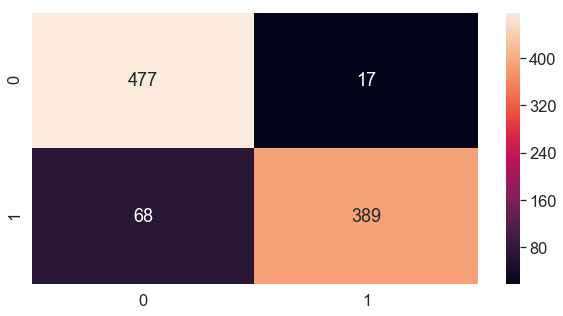

In [38]:
#Plot the confusion matrix
plt.rcParams['figure.figsize'] = (10,5)
sb.set(font_scale=1.5)
sb.heatmap(cm, annot=True, fmt='g')
plt.show()

---

### True Positives:TP
Este valor indica a quantidade de registros que foram classificados como positivos corretamente, ou seja, a resposta do classificador foi que o comentário era positivo e o comentário realmente era positivo.

In [39]:
TP = confusion_matrix_lda['Previsão dos positivos'][1]
dfTP = pandas.DataFrame(TP, index = ['Positivos verdadeiros'], columns = ['Quantidade acertos'] )

In [40]:
dfTP

,Quantidade acertos
Positivos verdadeiros,389


In [41]:
print(dfTP)

                       Quantidade acertos
Positivos verdadeiros                 389


---

### True Negatives:TN
Este valor indica a quantidade de registros que foram classificados como negativos de maneira correta, ou seja, a resposta do classificador foi que o comentário era negativo e o comentário realmente era negativo.

In [42]:
TN = confusion_matrix_lda['Previsão dos negativos'][0]
dfTN = pandas.DataFrame(TN, index = ['Verdadeiro Negativo'], columns = ['Quantidade acertos'] )

In [43]:
dfTN

,Quantidade acertos
Verdadeiro Negativo,477


In [44]:
print(dfTN)

                Quantidade acertos
Verdadeiro Negativo                 477


---

### Falso Positivos - False Positives:FP
Este valor indica a quantidade de registros que foram classificados como comentários positivos de maneira incorreta, ou seja, a resposta do classificador foi que o comentário era positivo, mas o comentário era negativo.

In [45]:
FP = confusion_matrix_lda['Previsão dos positivos'][0]
dfFP = pandas.DataFrame(FP, index = ['Falso Positivo'], columns = ['Quantidade acertos'] )

In [46]:
dfFP

,Quantidade acertos
Falso Positivo,17


In [47]:
print(dfFP)

                Quantidade acertos
Falso Positivo                  17


---

### False Negatives:FN
Este valor indica a quantidade de registros que foram classificados como comentários negativos de maneira incorreta, ou seja, a resposta do classificador foi que o comentário era negativo, mas o comentário era positivo.

In [48]:
FN = confusion_matrix_lda['Previsão dos negativos'][1]
dfFN = pandas.DataFrame(FN, index = ['Negativos Falsos'], columns = ['Quantidade acertos'] )

In [49]:
dfFN

,Quantidade acertos
Negativos Falsos,68


In [50]:
print(dfFN)

                       Quantidade acertos
Negativos Falsos                  68


---

### Especificidade (Specificity)
Especificidade é a proporção de previsões negativas corretas para o total não de previsões negativas. Isso determina o grau de especificidade do classificador na previsão de instâncias positivas.

Specificity = (Numero de previsões negativas correta) / (Total do Numero Negativas prevista)

TN = / TN + FP

In [51]:
Specificity = TN / float(TN + FP)
dfSpecificity = pandas.DataFrame(Specificity, index = ['Specificity'], columns = ['resultado'] )

In [52]:
dfSpecificity

,resultado
Specificity,0.965587


In [53]:
print(dfSpecificity)

             resultado
Specificity   0.965587


---

### Precisão Geral (Accuracy)
A precisão da classificação é a proporção de previsões corretas para o total não  de previsões. 

Accuracy = (numero de predições corretas / numero de predições)

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [54]:
#trés maneiras de fazer o caluclo
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))
print("Accuracy ", classifier.score(X_test, y_test)*100)
Accuracy= classifier.score(X_test, y_test)

0.9106203995793901
0.9106203995793901
Accuracy  91.062039957939


In [55]:
dfAccuracy = pandas.DataFrame(Accuracy, index = ['Accuracy'], columns = ['resultado'] )
dfAccuracy

,resultado
Accuracy,0.91062


In [56]:
print(dfAccuracy)

          resultado
Accuracy    0.91062


---

### Sensibilidade ou recordação Recall




Sensibilidade ou recordação é a razão de previsões positivas corretas para o total não de previsões positivas, ou, mais simplesmente, quão sensível o classificador é para detectar instâncias positivas. Isso também é chamado de True Positive Rate

Recall = (Numero de positivas previstas corretamente) /( total de Predições positivas)

$$Recall = \frac{TP}{TP +FN}$$


In [57]:
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))
Recall= recall_score(y_test, y_pred)

0.8512035010940919
0.8512035010940919


In [58]:
dfRecall = pandas.DataFrame(Recall, index = ['Sensibilidade-Recall'], columns = ['resultado'] )
dfRecall

,resultado
Sensibilidade-Recall,0.851204


In [59]:
print(dfRecall)

                      resultado
Sensibilidade-Recall   0.851204


---

## Taxa positiva falsa (False Positive Rate)
A *false positive rate*, é a proporção de previsões negativas que foram determinadas como positivas para o número total de previsões negativas ou quando o valor real é negativo, com que frequência a previsão é incorreta.

FalsePositveRate = Números de falsos positivos / Total de predições negativas


$$FalsePositveRate = \frac{FP}{ TN + FP}$$


In [60]:
print(FP / float(TN + FP))
FalsePositveRate = FP / float(TN + FP)

0.03441295546558704


In [61]:
dfFalsePositveRate = pandas.DataFrame(FalsePositveRate, index = ['Taxa de Falso Positvo'], columns = ['resultado'] )
dfFalsePositveRate

,resultado
Taxa de Falso Positvo,0.034413


In [62]:
print(dfFalsePositveRate)

                       resultado
Taxa de Falso Positvo   0.034413


---
### Precisão (Precision)
A precisão é a proporção de previsões corretas para o total  de não previsões preditas corretas. Isso mede a precisão do classificador ao prever instâncias positivas.

Precision = Número de positivas verdadeiras / Numero total de predicados positivos

$$Precision = \frac{TP} {TP + FP}$$

In [63]:
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))
Precision = precision_score(y_test, y_pred)

0.958128078817734
0.958128078817734


In [64]:
dfPrecision = pandas.DataFrame(Precision, index = ['Precisão'], columns = ['resultado'] )
dfPrecision

,resultado
Precisão,0.958128


In [65]:
print(dfPrecision)

          resultado
Precisão   0.958128


---

### F1 Score
O F1 Score é uma média harmônica entre precisão (que, apesar de ter o mesmo nome, não é a mesma citada acima) e recall. Veja abaixo as definições destes dois termos.

Ela é muito boa quando você possui um dataset com classes desproporcionais, e o seu modelo não emite probabilidades. Em geral, quanto maior o F1 score, melhor.



$$F1Score = \frac{2 \times Precisão \times Recall }{Precisão + Recall}$$


In [66]:
F1Score = 2 * Precision *  Recall /  Precision + Recall

In [67]:
print(F1Score)


2.553610503282276


In [68]:
dfF1Score = pandas.DataFrame(F1Score, index = ['F1 Score'], columns = ['resultado'] )
dfF1Score

,resultado
F1 Score,2.553611


In [69]:
print(dfF1Score)

          resultado
F1 Score   2.553611


---
### Curva ROC
Uma curva ROC é uma forma comumente usada para visualizar o desempenho de um classificador binário, significando um classificador com duas classes de saída possíveis. A curva plota a Taxa Positiva Real (Recall) contra a Taxa Falsa Positiva (também interpretada como Especificidade 1).

In [70]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Taxa de falsos positivos')
    plt.ylabel('Taxa de verdadeiros positivos')
    plt.title('Curva ROC:Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#### Calcula a propabildade de previsão.

In [71]:
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

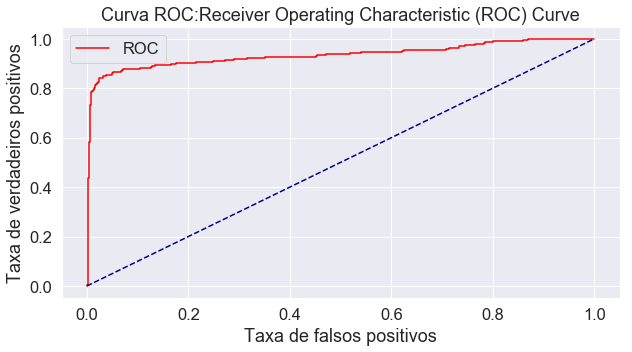

In [73]:
plot_roc_curve(fpr, tpr)

---

### AUC (área sob a curva) da Curva ROC
AUC ou Area Under the Curve é a porcentagem do gráfico do ROC que está abaixo da curva. AUC é útil como um único número de resumo do desempenho do classificador.

In [74]:
print(roc_auc_score(y_test, y_pred_prob))
Auc=roc_auc_score(y_test, y_pred_prob)

0.9339779764172256


In [75]:
dfAuc = pandas.DataFrame(Auc, index = ['AUC'], columns = ['resultado'] )
dfAuc

,resultado
AUC,0.933978


In [76]:
print(dfAuc)

     resultado
AUC   0.933978


---
### Histograma das Probabilidades da Previsão.
Após o treinamento, o modelo expõe um atributo chamado predict_prob, que retorna a probabilidade de os dados do teste estarem em uma determinada classe de resposta. A partir disso, obteremos as probabilidades de prever um resultado par determinr a genrero pela voz.

Text(0, 0.5, 'Frequência')

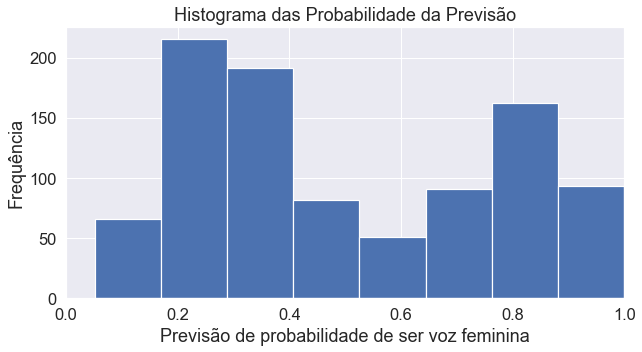

In [77]:
plt.hist(y_pred_prob, bins=8, linewidth=1.2)
plt.xlim(0, 1)
plt.title('Histograma das Probabilidade da Previsão')
plt.xlabel('Previsão de probabilidade de ser voz feminina')
plt.ylabel('Frequência')

---
### Precisão Geral (Accuracy_cross) por validação cruzada.
Precissão do modelo sobre tecnicar de Validação cruzada media dos resultados.

In [78]:
accuracy_cross


0.9000577183345275

In [79]:
dfaccuracy_cross = pandas.DataFrame(accuracy_cross, index = ['Acurácia por validação cruzada'], columns = ['resultado'] )
dfaccuracy_cross

,resultado
Acurácia por validação cruzada,0.900058


In [80]:
print(dfaccuracy_cross)

                                resultado
Acurácia por validação cruzada   0.900058


---
### Taxa entre as Accuracy e Accuracy_cross.
Taxa Perda de acurácia da validação cruzada em relação acurácia.

$$ RateLossAAC = \frac{Accuracy - Accuracy_cross }{Accuracy \times AccuracyCross} \times 100$$



In [81]:
print((Accuracy - accuracy_cross)/ Accuracy * accuracy_cross * 100) 
RateLossAAC = (Accuracy - accuracy_cross)/ Accuracy * accuracy_cross * 100

1.0440160120657485


In [82]:
dfRateLossAAC = pandas.DataFrame(RateLossAAC, index = ['Taxas perdas em acurácia e acurácia por validação cruzada'], columns = ['resultado'] )
dfRateLossAAC

,resultado
Taxas perdas em acurácia e acurácia por validação cruzada,1.044016


In [83]:
print(dfRateLossAAC)

                                                    resultado
Taxas perdas em acurácia e acurácia por validaç...   1.044016


---
##   17)   Modelo regressão logística rodando no modulo estatístico para análise de redução de probabilidade.

In [84]:
#summarize the model
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                   sexo   No. Observations:                 2217
Model:                          Logit   Df Residuals:                     2197
Method:                           MLE   Df Model:                           19
Date:                Wed, 18 Sep 2019   Pseudo R-squ.:                  0.8630
Time:                        08:17:37   Log-Likelihood:                -210.45
converged:                       True   LL-Null:                       -1536.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
meanfreq      -9.5665   2.52e+13  -3.79e-13      1.000   -4.94e+13    4.94e+13
sd           -35.9751     33.830     -1.063      0.288    -102.280      30.330
median        -3.0328      9.678     -0.313      0.7

c:\users\jorge\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\users\jorge\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\users\jorge\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


### Coeficientes da regressão. 

In [85]:
print(result.params)

meanfreq     -9.566454
sd          -35.975055
median       -3.032813
Q25           2.977875
Q75          -2.850482
IQR         -44.988253
skew         -0.474746
kurt         -0.030199
sp.ent      -53.311758
sfm          11.862621
mode         -3.830922
centroid     -9.566454
meanfun     163.906966
minfun      -40.961576
maxfun        5.989897
meandom       0.658639
mindom       16.795812
maxdom        1.923217
dfrange      -2.125986
modindx      -6.007787
int          33.111592
dtype: float64


##   18)  Equação da Regressão Logística
### A funão de y é:


$$p = P(Y=1) = \frac{1}{1 +e^{-(B0int+B1meanfreq+B2sd+B3median+B4Q25+B5Q75+B6IQR+...+B18mindom+B19maxdom+B20dfrange	+B21modindx)}}$$

$$g(x) = B0 +B1X1 + ... BpXp$$





---

## Reduzir as variáveis:
Dado intervalo de confinça de 95% e :
 $$p-valor = 0.05$$

In [86]:
Dados = []
for x in colunas:
    if x == "label":
        continue
    P = result.pvalues[x]
    if P >= 0.05:
        Dados.append(x)
Dados.append('int') 
print(Dados)
        


['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'skew', 'kurt', 'mode', 'centroid', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'int']


In [87]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,sexo,int
0,0.183506,0.064241,0.190591,0.142287,0.225624,0.075122,2.196061,8.442361,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.133737,0,1
1,0.183506,0.067310,0.190591,0.142482,0.225624,0.073252,2.196061,8.442361,0.892193,0.513724,...,0.107937,0.015826,0.274345,0.009014,0.007812,0.054688,0.046875,0.124252,0,1
2,0.183506,0.083829,0.190591,0.142287,0.225624,0.123207,2.196061,8.442361,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.124252,0,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.274345,0.201497,0.007812,0.562500,0.554688,0.129050,0,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.275533,0.712812,0.007812,5.484375,5.476562,0.126195,0,1


In [88]:
Xr_entrada = df.drop(columns=['sexo'])
Xr_entrada =  df[Dados]

In [89]:
Yr_entrada = df['sexo']

In [90]:
Xr_entrada.head()

,meanfreq,sd,median,Q25,Q75,skew,kurt,mode,centroid,maxfun,meandom,mindom,maxdom,dfrange,modindx,int
0,0.183506,0.064241,0.190591,0.142287,0.225624,2.196061,8.442361,0.000000,0.183506,0.275862,0.007812,0.007812,0.007812,0.000000,0.133737,1
1,0.183506,0.067310,0.190591,0.142482,0.225624,2.196061,8.442361,0.000000,0.183506,0.274345,0.009014,0.007812,0.054688,0.046875,0.124252,1
2,0.183506,0.083829,0.190591,0.142287,0.225624,2.196061,8.442361,0.000000,0.183506,0.271186,0.007990,0.007812,0.015625,0.007812,0.124252,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,1.232831,4.177296,0.083878,0.151228,0.274345,0.201497,0.007812,0.562500,0.554688,0.129050,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,1.101174,4.333713,0.104261,0.135120,0.275533,0.712812,0.007812,5.484375,5.476562,0.126195,1


In [91]:
Yr_entrada

0       0
1       0
2       0
3       0
4       0
       ..
3163    1
3164    1
3165    1
3166    1
3167    1
Name: sexo, Length: 3168, dtype: int64

##  19)  Divisão de 30% teste e 70%  para o treino.no.

In [92]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(Xr_entrada,Yr_entrada,test_size=0.30,random_state=0)

In [93]:

dictabela = {}
dictabela['Registros para treino'] = Xr_train.shape[0]
dictabela['Registros para teste'] = Xr_test.shape[0]

In [94]:
dftreinotester = pandas.DataFrame.from_dict(dictabela, orient="index").reset_index()

In [95]:
dftreinotester =dftreinotester.rename(columns={'index': 'divisão do dados'})
dftreinotester =dftreinotester.rename(columns={0: 'total'})
dftreinotester

,divisão do dados,total
0,Registros para treino,2217
1,Registros para teste,951


##  20)  Normalização dos dados por questão de escala.

In [96]:
Xr_train

,meanfreq,sd,median,Q25,Q75,skew,kurt,mode,centroid,maxfun,meandom,mindom,maxdom,dfrange,modindx,int
943,0.200303,0.061665,0.229964,0.135451,0.256245,1.619882,5.194025,0.256245,0.200303,0.279070,1.690770,0.023438,6.515625,6.492188,0.179513,1
2486,0.214223,0.037987,0.216717,0.206465,0.225556,3.377777,7.847583,0.220960,0.214223,0.279070,2.030966,0.023438,8.859375,8.835938,0.108594,1
517,0.150002,0.068328,0.162544,0.093932,0.202894,1.953073,7.469802,0.084131,0.150002,0.274345,0.470982,0.007812,4.875000,4.867188,0.135587,1
778,0.172459,0.059078,0.178675,0.111729,0.213958,1.473990,5.318155,0.209887,0.172459,0.274345,0.348145,0.017774,2.882812,2.796875,0.074115,1
1280,0.176249,0.076477,0.189526,0.118162,0.251532,2.258821,9.384604,0.258162,0.176249,0.279070,0.464062,0.023438,3.070312,3.046875,0.067483,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.165049,0.060078,0.178088,0.105885,0.211425,1.577942,5.393908,0.210907,0.165049,0.274345,0.696403,0.017774,4.921875,4.828125,0.129050,1
835,0.174274,0.057816,0.191211,0.116053,0.218474,1.932602,8.103753,0.199316,0.174274,0.279070,0.794705,0.023438,5.343750,5.320312,0.079036,1
1653,0.134785,0.082020,0.142053,0.057067,0.202405,1.341973,5.596726,0.200352,0.134785,0.275862,0.521739,0.023438,3.875000,3.851562,0.153772,1
2607,0.236909,0.029605,0.241928,0.220241,0.253494,3.055783,7.587060,0.241928,0.236909,0.279070,1.571875,0.023438,9.726562,9.703125,0.123188,1


In [97]:
# Instantiate 
normr = Normalizer()
# Fit
normr.fit(Xr_train)

Normalizer(copy=True, norm='l2')

In [98]:
Xr_train_norm = normr.transform(Xr_train)

In [99]:
Xr_test_norm = normr.transform(Xr_test)

In [100]:
print(Xr_train_norm.shape , Xr_test_norm.shape)

(2217, 16) (951, 16)


---
---

#  21)   Declarando o modelo com as variáveis reduzidas.

In [101]:
#logistic Regression
Rclassifier = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

##  22)  Declarando o modelo para Validação cruzada.

In [102]:
#logistic Regression
RclassifierComp = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

## 23)Treinando o modelo com redução das variáveis.

### Principal dos modelos.

In [103]:
Rclassifier.fit(Xr_train,yr_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
yr_pred=Rclassifier.predict(Xr_test)

##  Declarando o modelo para Validação cruzada.

In [105]:
Raccuracy_cross = cross_val_score(RclassifierComp, Xr_entrada,Yr_entrada, cv = 10, scoring='accuracy').mean()

---
# Modelo de avaliação de métricas.

### Matriz de confusão.

In [106]:
rcm=confusion_matrix(yr_test,yr_pred)

In [107]:
rconfusion_matrix_lda = pandas.DataFrame(rcm, index = ['Negativos','Positivos'], columns = ['Previsão dos negativos','Previsão dos positivos'] )
rconfusion_matrix_lda['Total'] = 1
rconfusion_matrix_lda['Total'][0] = rcm[0][0] + rcm[0][1]
rconfusion_matrix_lda['Total'][1] = rcm[1][0] + rcm[1][1]

In [108]:
rconfusion_matrix_lda

,Previsão dos negativos,Previsão dos positivos,Total
Negativos,406,88,494
Positivos,104,353,457


In [109]:
print(rconfusion_matrix_lda)

           Previsão dos negativos  Previsão dos positivos  Total
Negativos                     406                      88    494
Positivos                     104                     353    457


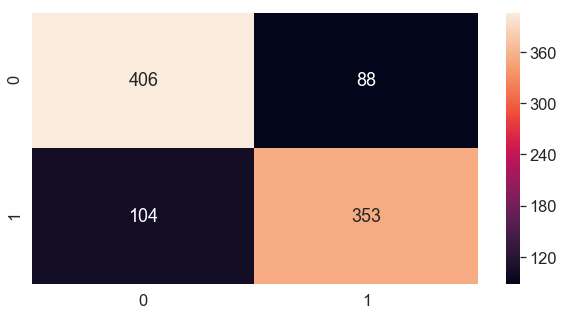

In [110]:
#Plot the confusion matrix
plt.rcParams['figure.figsize'] = (10,5)
sb.set(font_scale=1.5)
sb.heatmap(rcm, annot=True, fmt='g')
plt.show()

---

### Precisão Geral (Accuracy)
A precisão da classificação é a proporção de previsões corretas para o total não  de previsões. 

Accuracy = (numero de predições corretas / numero de predições)

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [111]:
RAccuracy= Rclassifier.score(Xr_test, yr_test)

In [112]:
dfRAccuracy = pandas.DataFrame(RAccuracy, index = ['Accuracy'], columns = ['resultado'] )
dfRAccuracy

,resultado
Accuracy,0.798107


In [113]:
print(dfRAccuracy)

          resultado
Accuracy   0.798107


### Curva ROC

In [114]:
yr_pred_prob = Rclassifier.predict_proba(Xr_test)[:, 1]

In [115]:
rfpr, rtpr, rthresholds = roc_curve(yr_test, yr_pred_prob)

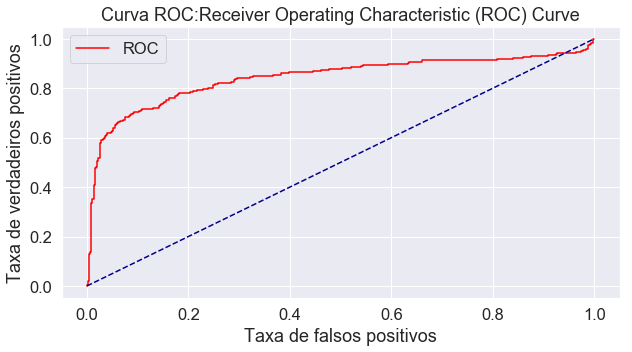

In [116]:
plot_roc_curve(rfpr, rtpr)

### AUC (área sob a curva) da Curva ROC.

In [117]:
print(roc_auc_score(yr_test, yr_pred_prob))
rAuc=roc_auc_score(yr_test, yr_pred_prob)

0.8422071421610751


In [118]:
dfrAuc = pandas.DataFrame(rAuc, index = ['AUC'], columns = ['resultado'] )
dfrAuc

,resultado
AUC,0.842207


In [119]:
print(dfrAuc)

     resultado
AUC   0.842207


---
### Precisão Geral (Accuracy_cross) por validação cruzada.
Precissão do modelo sobre tecnicar de Validação cruzada media dos resultados.

In [120]:
print(Raccuracy_cross)

0.7888981768967439


In [121]:
dfRaccuracy_cross = pandas.DataFrame(Raccuracy_cross, index = ['Acurácia por validação cruzada'], columns = ['resultado'] )
dfRaccuracy_cross

,resultado
Acurácia por validação cruzada,0.788898


In [122]:
print(dfRaccuracy_cross)

                                resultado
Acurácia por validação cruzada   0.788898


---
### Taxa entre as Accuracy e Accuracy_cross.
Taxa Perda de acurácia da validação cruzada em relação acurácia.

$$ RateLossAAC = \frac{Accuracy - Accuracy_cross }{Accuracy \times AccuracyCross} \times 100$$

In [123]:
print((RAccuracy - Raccuracy_cross)/ RAccuracy * Raccuracy_cross * 100) 
RRateLossAAC = (RAccuracy - Raccuracy_cross)/ RAccuracy * Raccuracy_cross * 100

0.9102818307854695


In [124]:
dfRRateLossAAC = pandas.DataFrame(RRateLossAAC, index = ['Taxas perdas em acurácia e acurácia por validação cruzada'], columns = ['resultado'] )
dfRRateLossAAC

,resultado
Taxas perdas em acurácia e acurácia por validação cruzada,0.910282


In [125]:
print(dfRRateLossAAC)

                                                    resultado
Taxas perdas em acurácia e acurácia por validaç...   0.910282


## Gráficos comparativos.

### Acurácia entre modelos de regressão logística, todos dados, treinado por validação cruzada, treinado com redução de dimensionabilidade.

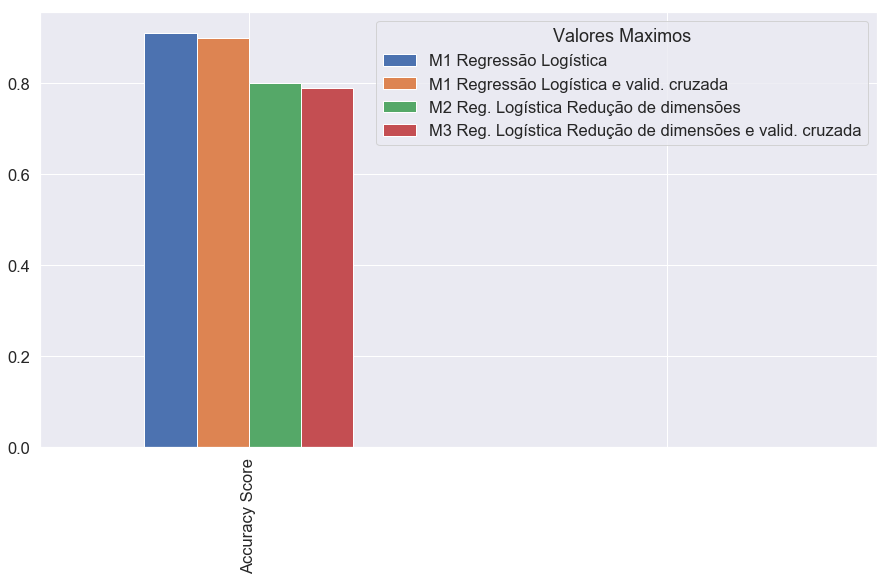

In [126]:
df = pandas.DataFrame(([Accuracy,accuracy_cross,RAccuracy,Raccuracy_cross],[]), 
                  index=['Accuracy Score',''],
                  columns=pandas.Index(['M1 Regressão Logística','M1 Regressão Logística e valid. cruzada','M2 Reg. Logística Redução de dimensões','M3 Reg. Logística Redução de dimensões e valid. cruzada'], 
                 name='Valores Maximos')).round(2)
df.plot(kind='bar',figsize=(15,8))

### Acurácia e área da curva da ROC entre modelos de regressão logística e  regressão logística com redução de dimensionabilidade.

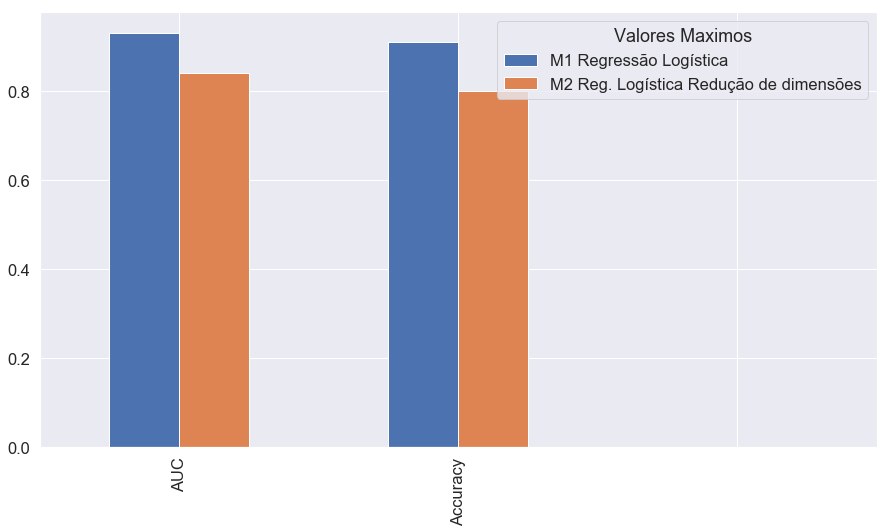

In [127]:
df = pandas.DataFrame(([Auc,rAuc,],[Accuracy,RAccuracy],[]), 
                  index=['AUC','Accuracy',''],
                  columns=pandas.Index(['M1 Regressão Logística','M2 Reg. Logística Redução de dimensões'], 
                 name='Valores Maximos')).round(2)
df.plot(kind='bar',figsize=(15,8))

# Fim da avaliação do modelo.

# Salva dados para usar no gráfico consolidado.

In [128]:
dic_logist={}

In [129]:
dic_logist['RAccuracy']=RAccuracy
dic_logist['Accuracy']=Accuracy

dic_logist['accuracy_cross']=accuracy_cross
dic_logist['Raccuracy_cross']=Raccuracy_cross

dic_logist['Auc']=Auc
dic_logist['rAuc']=rAuc

dic_logist['rfpr']=rfpr
dic_logist['rtpr']=rtpr


dic_logist['fpr']=fpr
dic_logist['tpr']=tpr











In [130]:
#dic_logist

In [131]:
import pickle

In [132]:
filename = 'regressaologitica.jss'
outfile = open(filename,'wb')
pickle.dump(dic_logist,outfile)
outfile.close()

In [133]:
infile = open(filename,'rb')
test_dict = pickle.load(infile)
infile.close()

In [134]:
#print(test_dict)


In [135]:
print(type(test_dict))

<class 'dict'>
